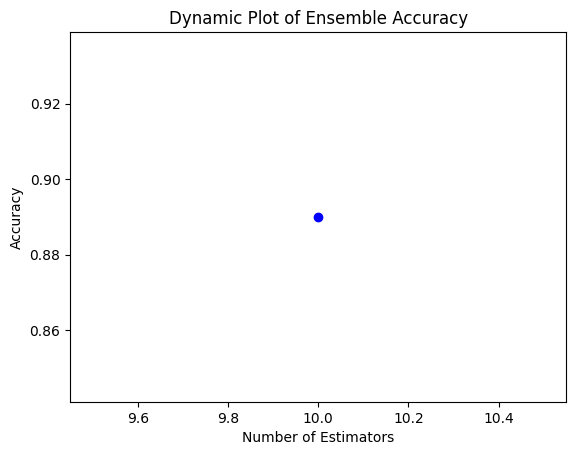

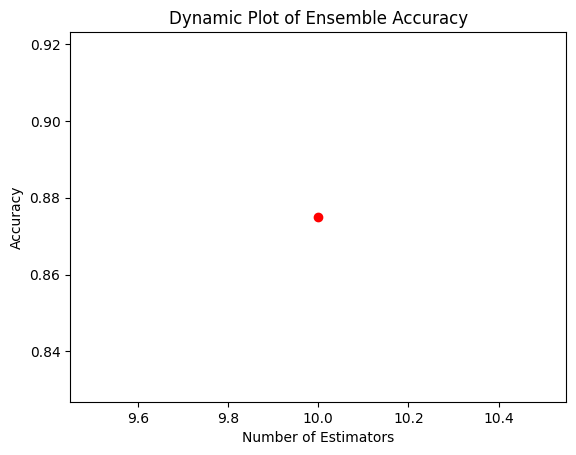

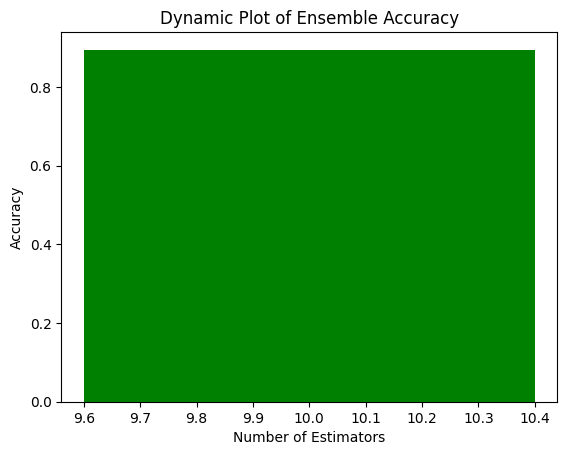

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Fungsi untuk membuat closure model ensemble
def create_model(X_train, y_train):
    models = []  # List untuk menyimpan model-model individu dalam ensemble

    def train_and_predict(model):
        model.fit(X_train, y_train)
        return model.predict

    # Tambahkan model-model individu ke dalam list
    for _ in range(3):
        model = RandomForestClassifier(n_estimators=10)
        models.append(train_and_predict(model))

    # Fungsi ensemble
    def ensemble_predict(X):
        predictions = np.array([model(X) for model in models])
        return np.mean(predictions, axis=0)

    return ensemble_predict

# Fungsi untuk dynamic plotting
def dynamic_plot(X_train, y_train, X_test, y_test, plot_type):
    fig, ax = plt.subplots()
    ax.set_xlabel('Number of Estimators')
    ax.set_ylabel('Accuracy')
    ax.set_title('Dynamic Plot of Ensemble Accuracy')

    X = np.arange(10, 100, 10)
    accuracies = []

    for n_estimators in X:
        ensemble_predict = create_model(X_train, y_train)
        ensemble_model = ensemble_predict(X_test)
        ensemble_model = np.round(ensemble_model)
        accuracy = accuracy_score(y_test, ensemble_model)
        accuracies.append(accuracy)
        if plot_type == 'line':
            ax.plot(X[:len(accuracies)], accuracies, '-o', color='b')
        elif plot_type == 'scatter':
            ax.scatter(X[:len(accuracies)], accuracies, color='r')
        elif plot_type == 'bar':
            ax.bar(X[:len(accuracies)], accuracies, color='g')
        else:
            print("Jenis plot tidak valid.")

        plt.pause(0.1)

    plt.show()

# Main program
if __name__ == "__main__":
    # Generate data
    X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Dynamic plotting dengan jenis plot yang berbeda
    dynamic_plot(X_train, y_train, X_test, y_test, 'line')
    dynamic_plot(X_train, y_train, X_test, y_test, 'scatter')
    dynamic_plot(X_train, y_train, X_test, y_test, 'bar')
